<a href="https://colab.research.google.com/github/Sohaibsul/velocity_ML_intership/blob/main/Sohaib_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import libraries**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## **load clean dataset **

In [3]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('cleaned_tested.csv')

Saving cleaned_tested.csv to cleaned_tested.csv


# **Encode Categorical Columns**

In [13]:
# Use get_dummies for 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


# **Split Features & Target**

In [22]:
# X: features, y: target
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (418, 8)
y shape: (418,)


In [23]:
print(X.isnull().sum())
print("Total NaNs:", X.isnull().sum().sum())


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Total NaNs: 1


In [19]:
# Check numeric columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Fill numeric columns with median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Verify again
print(X.isnull().sum())
print("Total NaNs after fill:", X.isnull().sum().sum())


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64
Total NaNs after fill: 0


# **Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (334, 8)
Test set: (84, 8)


# **Build Model: Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# **Evaluate the Model**

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


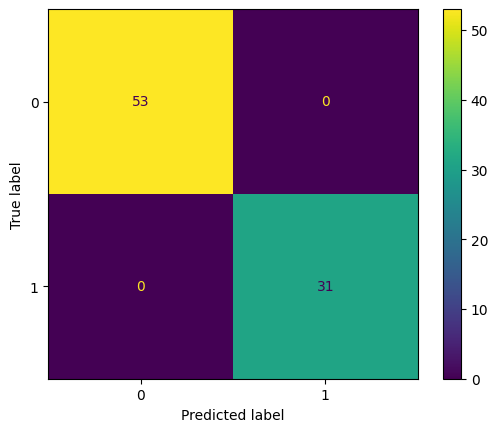

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [26]:
# Select numeric columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Fill any numeric NaNs with median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Drop any rows still with NaNs
X = X.dropna()
y = y.loc[X.index]  # Keep target aligned!

# Confirm: this must be zero
print("NaNs in X before cross_val:", X.isnull().sum().sum())


NaNs in X before cross_val: 0


# **Cross-Validation**

In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


# **Metrics Table**

In [28]:
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Cross-Val Accuracy (mean)'],
    'Score': [accuracy, precision, recall, np.mean(cv_scores)]
})

metrics


,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,Cross-Val Accuracy (mean),1.0


# **summary**

In this task , I built a Logistic Regression model to predict survival.  
One challenge was ensuring all categorical variables were properly encoded.  
you  learned the importance of cross-validation to avoid overfitting and how different metrics (accuracy, precision, recall) show different aspects of model performance.
